## Line detection by color segmentation

In [1]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
import matplotlib.pyplot as plt
from matplotlib import colors
from common.functions import *
import numpy as np
import imutils
import cv2

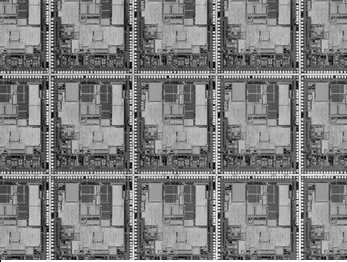

In [2]:
die_img = cv2.imread('dies_or.png')
die_gray = cv2.cvtColor(die_img, cv2.COLOR_BGR2GRAY)

h, w = die_gray.shape[:2]
displayImage_fromcv2(die_gray, w, h)

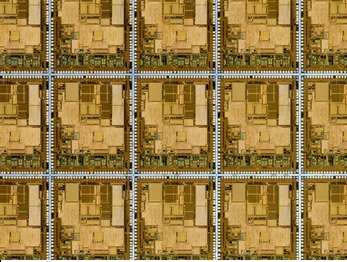

In [3]:
die_rgb = cv2.cvtColor(die_img, cv2.COLOR_BGR2RGB)
h, w = die_rgb.shape[:2]
displayImage_fromcv2(die_rgb, w, h)

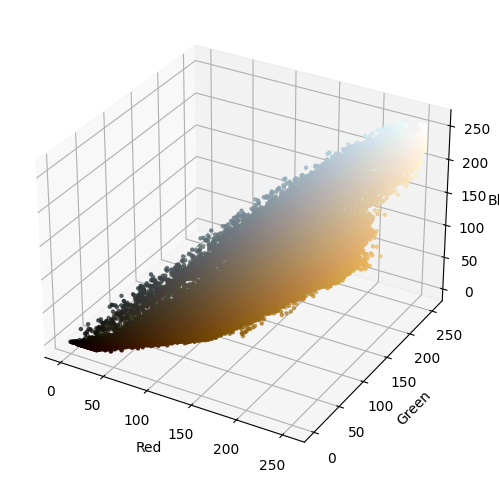

In [4]:
# Splitting components of image
r, g, b = cv2.split(die_rgb)

# Creating Figure for 3D plot
fig = plt.figure(figsize=(6,6))
axis = fig.add_subplot(1, 1, 1, projection='3d')

# Normalising list of pixels
pixel_colors = die_rgb.reshape((np.shape(die_rgb)[0] * np.shape(die_rgb)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Plotting
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [5]:
# Thresholds for segmenting Die
light_orange = (0, 210, 0)
dark_orange = (255, 255, 255)

In [6]:
# Segmenting Die according to thresholds, using a mask
mask = cv2.inRange(die_rgb, light_orange, dark_orange)
segmented_die = cv2.bitwise_and(die_img, die_img, mask=mask)

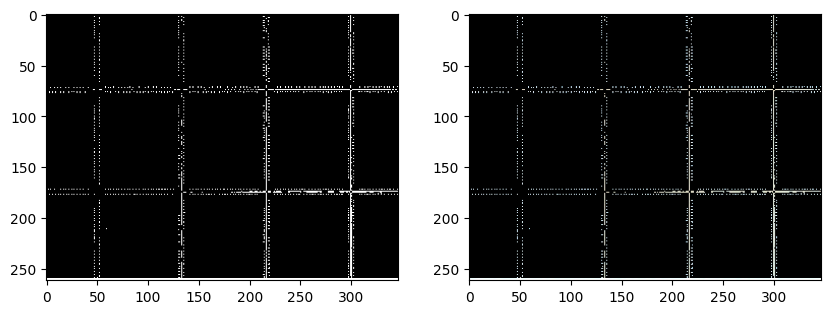

In [7]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(segmented_die)
plt.show()

## Line detection by Hough Transform

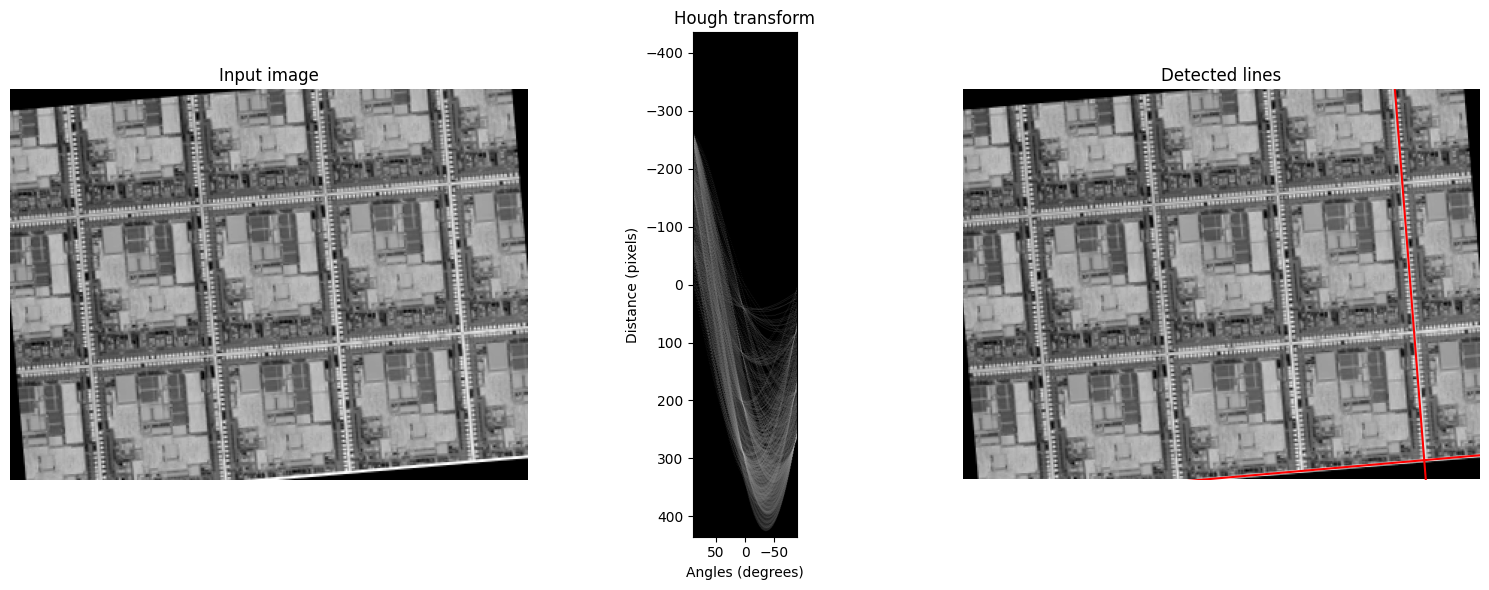

In [9]:
from skimage.transform import hough_line, hough_line_peaks

die_img = cv2.imread('dies_or.png',0)
# die_img = cv2.medianBlur(die_img,1)
rot_die_img = imutils.rotate(die_img, angle=5)
rot_die_rgb = cv2.cvtColor(rot_die_img, cv2.COLOR_BGR2RGB)

# Segmenting Die according to thresholds, using a mask
mask = cv2.inRange(rot_die_rgb, light_orange, dark_orange)
segmented_rot_die = cv2.bitwise_and(rot_die_img, rot_die_img, mask=mask)



tested_angles = np.linspace(-np.pi/2,np.pi/2,180)
hspace, theta, dist = hough_line(segmented_rot_die, tested_angles)
h, q, d = hough_line_peaks(hspace, theta, dist)


angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(rot_die_img, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(rot_die_img, cmap='gray')

origin = np.array((0, rot_die_img.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((rot_die_img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()


In [35]:
from skimage.transform import hough_line, hough_line_peaks

# Image adquisition and color segmentation
# ----------------------------------------
die_img = cv2.imread('dies_or.png',0)
# die_img = cv2.medianBlur(die_img,3)
rot_die_img = imutils.rotate(die_img, angle=1)
rot_die_rgb = cv2.cvtColor(rot_die_img, cv2.COLOR_BGR2RGB)

mask = cv2.inRange(rot_die_rgb, light_orange, dark_orange) # Segmenting Die according to thresholds, using a mask
segmented_rot_die = cv2.bitwise_and(rot_die_img, rot_die_img, mask=mask)

Angulo: -1.01°
Angulo: -91.51°


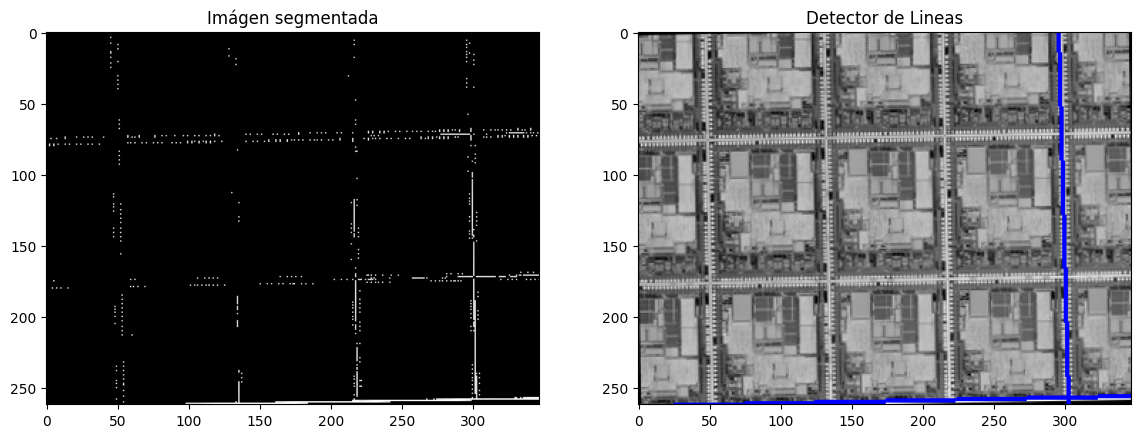

In [36]:
# Hough transform and lines drawing
# ---------------------------------
tested_angles = np.linspace(-np.pi/2,np.pi/2,180)
hspace, theta, dist = hough_line(segmented_rot_die, tested_angles)
h, q, d = hough_line_peaks(hspace, theta, dist)


angle_list=[]  #Create an empty list to capture all angles

origin = np.array((0, rot_die_img.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    texto = f'Angulo: {np.round((angle*180/np.pi)-90,2)}°'
    print(texto)
    cv2.line(rot_die_rgb,(origin[0],int(y0)),(origin[1],int(y1)),(0,0,255),2)

images = {'Imágen segmentada':segmented_rot_die,
          'Detector de Lineas':rot_die_rgb
        }

compare(images)